# Optimization report - Tom Marini

The goal of this report is to show how the momentum algorithm can enhance the convergence speed of the optimization algorithm. 

In [19]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Dataset
In the example below, we'll create a set of 500,000 points around the line $y = 2x+17+\epsilon$, for values of x between 0 and 100:

In [20]:
f = lambda x: x*2+17+np.random.randn(len(x))*10

x = np.random.random(500000)*100
y = f(x) 
m = len(y)

First, let's randomly shuffle around our dataset. Note that in this example, this step isn't strictly necessary since the data is already in a random order. However, that obviously may not always be the case:

In [21]:
from random import shuffle

x_shuf = []
y_shuf = []
index_shuf = list(range(len(x)))
shuffle(index_shuf)
for i in index_shuf:
    x_shuf.append(x[i])
    y_shuf.append(y[i])

actualvalues = sp.stats.linregress(x,y)
print("Actual values for theta are:")
print("theta_0 =", actualvalues.intercept)
print("theta_1 =", actualvalues.slope)

Actual values for theta are:
theta_0 = 17.029138325186054
theta_1 = 1.9997095884396603


## Momentum algorithm

Let's implement a momentum algorithm. 
Our goal is to find the equation of the straight line $h_\theta(x) = \theta_0 + \theta_1 x$ that best fits our data points.  
The momentum algorithm is a method that helps accelerate SGD in the relevant direction and dampens oscillations. 

The cost function for one observation ${i}$ is:

$Cost_{i}(\theta) = {1 \over 2}(h_\theta(x_i)-y_i)^2$

The gradient of the cost function for one observation is:

$\nabla Cost_{i}(\theta) = \begin{bmatrix}
 (h_\theta(x_i)-y_i) \\ 
 x_i(h_\theta(x_i)-y_i) \\ 
 \end{bmatrix}$

The momentum algorithm works by adding a fraction $\alpha$ of the update vector of the past time step to the current update vector:

$\Delta\theta := \alpha\Delta\theta - \mu \nabla Cost_{i}(\theta)$

$\theta := \theta + \Delta\theta$

The algorithm is as follows:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Randomly shuffle the data set <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>for</b> i = 1 to m <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
$\Delta\theta := \alpha\Delta\theta - \mu \nabla Cost_\theta(x)$ <br>
&nbsp;&nbsp;&nbsp; 5:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
$\theta := \theta + \Delta\theta$<br>
&nbsp;&nbsp;&nbsp;    6: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>end for</b> <br> 
&nbsp;&nbsp;&nbsp;    7: &nbsp;  <b>end for</b>

Where:  
$\alpha$ is a parameter that controls the amount of momentum in the algorithm. It is between 0 and 1.   
$\mu$ is the learning rate.  

Initialty $\Delta\theta$ is set to zero.

Let's define the functions h, the cost and its gradient.

In [22]:
h = lambda theta,x: theta[0] + theta[1]*x
cost = lambda theta, x_i, y_i: 0.5*(h(theta,x_i)-y_i)**2
cost_grad = lambda theta, x_i, y_i: np.array([(h(theta,x_i)-y_i), (h(theta,x_i)-y_i)*x_i])

Now we'll run our momentum algorithm. To see it's progress, we'll take a cost measurement at every step. Every 10,000 steps, we'll get an average cost from the last 10,000 steps and then append that to our cost_list variable. We will run through the entire list 10 times here:

In [23]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
delta_theta = np.array([0.,0.])
mu = 0.00000005 # step size, learning rate
alpha = 0.999 # momentum parameter
iter_num = 0
s_k = np.array([float("inf"),float("inf")])
sum_cost = 0
cost_list = []

for j in range(10):
    for i in range(m):
        iter_num += 1
        theta_old = theta_new
        delta_theta = alpha * delta_theta - mu * cost_grad(theta_old,x[i],y[i])
        theta_new = theta_old + delta_theta
        sum_cost += cost(theta_old,x[i],y[i])
        if (i+1) % 10000 == 0:
            cost_list.append(sum_cost/10000.0)
            sum_cost = 0   
            
print("Local minimum occurs where:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])

Local minimum occurs where:
theta_0 = 17.084459908204117
theta_1 = 1.9348703658805797


The values found are close from their true values, $\theta_0 = 17$ and $\theta_1 = 2$.

Now, we plot our cost versus the number of iterations. As you can see, the cost goes down quickly at first, but starts to level off as we go through more iterations:

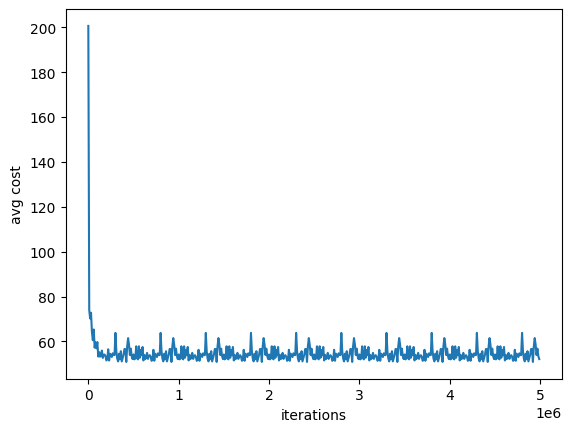

In [24]:
iterations = np.arange(len(cost_list))*10000
plt.plot(iterations,cost_list)
plt.xlabel("iterations")
plt.ylabel("avg cost")
plt.show()

We can notice that the convergence is much faster than the stochastic gradient descent algorithm, see below for the reminder of results. This is because the momentum algorithm accelerates the convergence in the relevant direction and dampens oscillations. Making this algorithm run longer is useless because the cost function reached a stable level and won't decrease anymore.

# Reminder of SGD results

As a reminder, these were the results of the stochastic gradient descent algorithm, which we ran in the previous notebook. You can find the iteration versus cost plot of the stochastic gradient descent algorithm at the end.

In [25]:
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x
cost = lambda theta_0,theta_1, x_i, y_i: 0.5*(h(theta_0,theta_1,x_i)-y_i)**2

Now we'll run our stochastic gradient descent algorithm. To see it's progress, we'll take a cost measurement at every step. Every 10,000 steps, we'll get an average cost from the last 10,000 steps and then append that to our cost_list variable. We will run through the entire list 10 times here:

In [26]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
n_k = 0.000005 # step size

iter_num = 0
s_k = np.array([float("inf"),float("inf")])
sum_cost = 0
cost_list = []

for j in range(10):
    for i in range(m):
        iter_num += 1
        theta_old = theta_new
        s_k[0] = (h(theta_old[0],theta_old[1],x[i])-y[i])
        s_k[1] = (h(theta_old[0],theta_old[1],x[i])-y[i])*x[i]
        s_k = (-1)*s_k
        theta_new = theta_old + n_k * s_k
        sum_cost += cost(theta_old[0],theta_old[1],x[i],y[i])
        if (i+1) % 10000 == 0:
            cost_list.append(sum_cost/10000.0)
            sum_cost = 0   
            
print("Local minimum occurs where:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])

Local minimum occurs where:
theta_0 = 16.99860931296314
theta_1 = 1.9775624412534474


As you can see, our values for $\theta_0$ and $\theta_1$ are close to their true values of 17 and 2.

Now, we plot our cost versus the number of iterations. As you can see, the cost goes down quickly at first, but starts to level off as we go through more iterations:

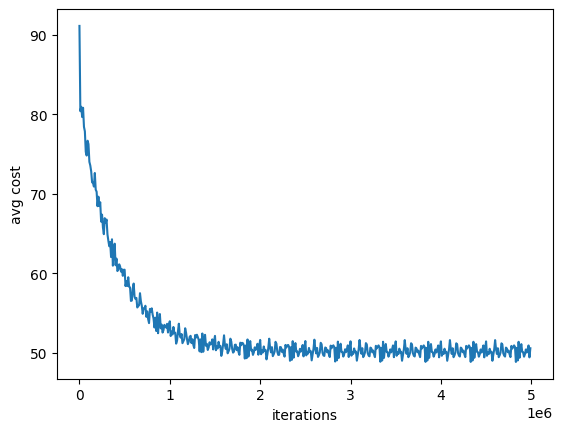

In [27]:
iterations = np.arange(len(cost_list))*10000
plt.plot(iterations,cost_list)
plt.xlabel("iterations")
plt.ylabel("avg cost")
plt.show()